In [1]:
import sys 
sys.path.append('..')

from models import DIFDensityEstimator,SoftmaxWeight,LocationScaleFlow
from targets import DensityEstimationTarget
%load_ext autoreload
%autoreload 2
import torch
import matplotlib.pyplot as plt

In [2]:
from matplotlib.colors import ListedColormap
import numpy as np
N = 256
orange = np.ones((N, 4))
orange[:, 0] = np.geomspace(255 / 256, 1, N)  # R = 255
orange[:, 1] = np.geomspace(165 / 256, 1, N)  # G = 165
orange[:, 2] = np.geomspace(0.001 / 256, 1, N)  # B = 0
orange_cmap = ListedColormap(orange[::-1])

orange_color = "#FFA500"

red = np.ones((N, 4))
red[:, 0] = np.geomspace(255 / 256, 1, N)  # R = 255
red[:, 1] = np.geomspace(0.001 / 256, 1, N)  # G = 0
red[:, 2] = np.geomspace(0.001 / 256, 1, N)  # B = 0
red_cmap = ListedColormap(red[::-1])

red_color = "#FF0000"

blue = np.ones((N, 4))
blue[:, 0] = np.geomspace(0.001 / 256, 1, N)  # R = 0
blue[:, 1] = np.geomspace(0.001 / 256, 1, N)  # G = 0
blue[:, 2] = np.geomspace(255 / 256, 1, N)  # B = 255
blue_cmap = ListedColormap(blue[::-1])

blue_color = "#0000FF"

green = np.ones((N, 4))
green[:, 0] = np.geomspace(0.001 / 256, 1, N)  # R = 0
green[:, 1] = np.geomspace(128 / 256, 1, N)  # G = 128
green[:, 2] = np.geomspace(0.001 / 256, 1, N)  # B = 128
green_cmap = ListedColormap(green[::-1])

green_color = "#008000"

pink = np.ones((N, 4))
pink[:, 0] = np.geomspace(255 / 256, 1, N)  # R = 255
pink[:, 1] = np.geomspace(0.001 / 256, 1, N)  # G = 0
pink[:, 2] = np.geomspace(211 / 256, 1, N)  # B = 211
pink_cmap = ListedColormap(pink[::-1])

pink_color = "#FF00D3"

purple = np.ones((N, 4))
purple[:, 0] = np.geomspace(51 / 256, 1, N)  # R = 102
purple[:, 1] = np.geomspace(0.001 / 256, 1, N)  # G = 0
purple[:, 2] = np.geomspace(51 / 256, 1, N)  # B = 102
purple_cmap = ListedColormap(purple[::-1])

purple_color = "#660066"

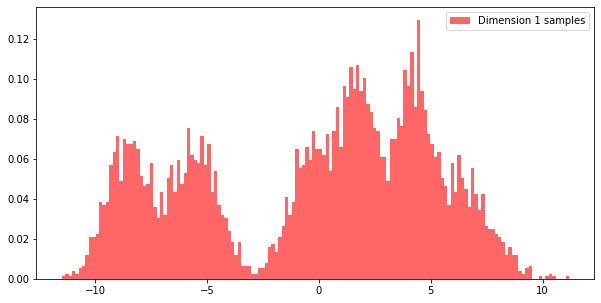

In [3]:
example = "Dimension 1"
num_samples = 50000
target = DensityEstimationTarget(example, num_samples)
target.target_visual()
target_samples = target.get_samples()

In [ ]:
epochs = 200
K = 10
p = target_samples.shape[-1]
dif = DIFDensityEstimator(target_samples, K)
dif.w = SoftmaxWeight(K,p, [64,64,64])
dif.train(epochs,5000)

 20%|███████████████████████████████████▊                                                                                                                                               | 40/200 [01:41<08:51,  3.32s/it, loss = 3.003451]

In [ ]:
### Visualize DIF density estimation dimension 1 ###

model_to_visualize = dif

import seaborn as sns
linspace = 500
with torch.no_grad():
    tt = torch.linspace(torch.min(model_to_visualize.target_samples), torch.max(model_to_visualize.target_samples), linspace).unsqueeze(1)
    model_density = torch.exp(model_to_visualize.log_density(tt))
    model_samples = model_to_visualize.sample_model(num_samples)
    reference_samples = model_to_visualize.reference.sample(num_samples)
    tt_r = torch.linspace(torch.min(reference_samples), torch.max(reference_samples), linspace).unsqueeze(1)
    reference_density = torch.exp(model_to_visualize.reference.log_density(tt_r))
    proxy_samples = model_to_visualize.sample_latent(model_to_visualize.target_samples[:num_samples])
fig = plt.figure(figsize=(28, 16))
ax1 = fig.add_subplot(221)
sns.histplot(model_to_visualize.target_samples[:, 0].cpu(),  stat="density", alpha=0.5, bins=125, color=red_color,
             label="Input Target Samples")
ax1.legend()

ax2 = fig.add_subplot(222)
sns.histplot(proxy_samples[:, 0].cpu(), stat='density', alpha=0.5, bins=125, color=orange_color,
             label='Proxy samples')
ax2.legend()

ax3 = fig.add_subplot(223, sharex=ax1)
ax3.plot(tt.cpu(), model_density.cpu(), color=blue_color, label="Output model density")
sns.histplot(model_samples[:, 0].cpu(), stat='density', alpha=0.5, bins=125, color=blue_color,
             label='model samples')
ax3.legend()

ax4 = fig.add_subplot(224, sharex=ax2)
ax4.plot(tt_r.cpu(), reference_density.cpu(), color=green_color, label='reference density')
sns.histplot(reference_samples[:, 0].cpu(), stat='density', alpha=0.5, bins=125, color=green_color,
             label='Reference samples')
ax4.legend()

In [ ]:
example = "Moons"
num_samples = 50000
target = DensityEstimationTarget(example, num_samples)
target.target_visual()
target_samples = target.get_samples()

In [ ]:
epochs = 200
K = 10
p = target_samples.shape[-1]
dif = DIFDensityEstimator(target_samples, K)
dif.w = SoftmaxWeight(K,p, [64,64,64])
dif.train(epochs,5000)

In [ ]:
model_to_visualize = dif

linspace = 200
with torch.no_grad():
    model_samples = model_to_visualize.sample_model(num_samples)
    reference_samples = model_to_visualize.reference.sample(num_samples)
    proxy_samples = model_to_visualize.sample_latent(model_to_visualize.target_samples[:num_samples])
    x0_min = min([min(model_samples[:,0]), min(model_to_visualize.target_samples[:,0])])
    x0_max = max([max(model_samples[:,0]), max(model_to_visualize.target_samples[:,0])])
    x1_min = min([min(model_samples[:,1]), min(model_to_visualize.target_samples[:,1])])
    x1_max = max([max(model_samples[:,1]), max(model_to_visualize.target_samples[:,1])])
    x_grid = torch.cartesian_prod(torch.linspace(x0_min, x0_max,linspace),torch.linspace(x1_min, x1_max,linspace))
    density_x = torch.exp(model_to_visualize.log_density(x_grid).reshape(linspace,linspace))
    z0_min = min([min(proxy_samples[:,0]), min(reference_samples[:,0])])
    z0_max = max([max(proxy_samples[:,0]), max(reference_samples[:,0])])
    z1_min = min([min(proxy_samples[:,1]), min(reference_samples[:,1])])
    z1_max = max([max(proxy_samples[:,1]), max(reference_samples[:,1])])
    z_grid = torch.cartesian_prod(torch.linspace(z0_min, z0_max,linspace),torch.linspace(z1_min, z1_max,linspace))
    density_z = torch.exp(model_to_visualize.reference.log_density(z_grid).reshape(linspace,linspace))
fig = plt.figure(figsize=(28, 20))

ax1 = fig.add_subplot(321)
plt.scatter(model_to_visualize.target_samples[:, 0],model_to_visualize.target_samples[:, 1], alpha=0.5,color='red',label="Input Target Samples")
ax1.legend()

ax2 = fig.add_subplot(322)
plt.scatter(proxy_samples[:, 0],proxy_samples[:, 1],alpha=0.5, color=orange_color,label='Proxy samples')
ax2.legend()

ax3 = fig.add_subplot(323, sharex=ax1)
ax3.scatter(model_samples[:,0], model_samples[:,1], alpha = 0.5,color=blue_color, label="Output model density")

ax3.legend()

ax4 = fig.add_subplot(324, sharex=ax2)
ax4.scatter(reference_samples[:, 0],reference_samples[:, 1], alpha=0.5, color=green_color,label='Reference samples')
ax4.legend()

ax5 = fig.add_subplot(325, sharex=ax2)
ax5.pcolormesh(torch.linspace(x0_min, x0_max,linspace),torch.linspace(x1_min, x1_max,linspace), density_x.T, cmap =blue_cmap)
ax5.legend()


ax6 = fig.add_subplot(326, sharex=ax2)
ax6.pcolormesh(torch.linspace(z0_min, z0_max,linspace),torch.linspace(z1_min, z1_max,linspace), density_z.T, cmap = green_cmap)
ax6.legend()